# Quantifying the World: Case Study 1
Eric Romero, Patricia Attah, Antonio Debouse

<span style='background:yellow'> 
We are resubmitting the following corrected sections, new section text is highlighted in report:

* Corrected improperly joined datasets using Cbind.
* Changed RFE to L1 penalties for feature reduction instead of RFE. 
    * This used 158 features rather than only using 5 total features.
    * Reduced the runtime from 6.5 hours to mere seconds!
* Added an analysis of the most important feature coefficients including a table and chart of values.
* Added Mean Absolute Error metric and analysis for RidgeCV model
* Updated Conclusions
    
</span>

### Table of Contents:

   * <a href="#DESCR"> Business Understanding </a>
   * <a href="#RFE"> Data Evaluation </a>
   * <a href="#L1MODEL"> Lasso Regression (L1) Model for Feature Reduction</a>
   * <a href="#L2MODEL"> Ridge Regression CV (L2) Model </a>
   * <a href="#L2MODEL"> Model Coefficient Analysis</a>
   * <a href="#L2MODEL"> Model Metrics </a>
   * <a href="#CONCL"> Conclusions </a>
   

<a id="DESCR"></a>
## Business Understanding

### Task:
* Build a linear regression model using L1 or L2 regularization (or both) to predict the critical temperature. In addition, we will examine which variable(s) carry the most importance.    
    * Data points include a material composition, temperature, which they superconduct. 

### Additional Information:
* There is a metadata file that will describe each column for you.

* There's no missing data in this particular study.

* How will the scientists determine if the model is interpretable or explainable?
    * We will need to tell them in the model the relative importance of each column or variable.
* Need to use linear regression for this model
    * Should use cross fold validation methods

### Data Evaluation

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('train.csv')
mat_df = pd.read_csv('unique_m.csv')

In [3]:
train_df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [4]:
train_df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [5]:
mat_df.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [6]:
mat_df.describe()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
count,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.0,21263.0,21263.000000
mean,0.017685,0.0,0.012125,0.034638,0.142594,0.384968,0.013284,3.009129,0.014874,0.0,...,0.034108,0.020535,0.036663,0.047954,0.042461,0.201009,0.0,0.0,0.0,34.421219
std,0.267220,0.0,0.129552,0.848541,1.044486,4.408032,0.150427,3.811649,0.132119,0.0,...,0.307888,0.717975,0.205846,0.272298,0.274365,0.655927,0.0,0.0,0.0,34.254362
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000210
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,5.365000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,20.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.800000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,63.000000
max,14.000000,0.0,3.000000,40.000000,105.000000,120.000000,12.800000,66.000000,4.000000,0.0,...,5.800000,64.000000,8.000000,7.000000,19.000000,14.000000,0.0,0.0,0.0,185.000000


### Model Preparations

In [7]:
#combine datasets, removal of duplicates
mat_df = mat_df.drop(columns=['critical_temp'])
df_complete = pd.concat([train_df, mat_df], axis=1)
df_complete.shape

(21263, 169)

In [8]:
pd.set_option('display.max_columns', None)
df_complete

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp,H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425000,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.250000,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,3572.596624,81.837500,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.905500,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.20,1.80,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.2La1.8Cu1O4
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440000,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.200000,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,3632.649185,90.890000,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.784400,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.10,1.90,0.0,0.0,0.0,0,0.0,0.0,0.0,

## Correlation Matrix

In [9]:
%%time
# correlation matrix of data
c = df_complete.corr()

Wall time: 1.68 s


In [10]:
c_sorted = c.sort_values('critical_temp',ascending=False) # to get top positive correlated variable

c_sorted['critical_temp'].head(10)

critical_temp                  1.000000
wtd_std_ThermalConductivity    0.721271
range_ThermalConductivity      0.687654
range_atomic_radius            0.653759
std_ThermalConductivity        0.653632
wtd_entropy_atomic_mass        0.626930
wtd_entropy_atomic_radius      0.603494
number_of_elements             0.601069
range_fie                      0.600790
wtd_std_atomic_radius          0.599199
Name: critical_temp, dtype: float64

In [11]:
c_sorted = c.sort_values('critical_temp',ascending=True) # to get top negative correlated variable

c_sorted['critical_temp'].head(10)

wtd_mean_Valence       -0.632401
wtd_gmean_Valence      -0.615653
mean_Valence           -0.600085
gmean_Valence          -0.573068
gmean_Density          -0.541684
wtd_gmean_Density      -0.540046
wtd_range_Valence      -0.439901
wtd_mean_Density       -0.433940
wtd_gmean_FusionHeat   -0.432365
gmean_FusionHeat       -0.431795
Name: critical_temp, dtype: float64

### Normalizing Data

In [12]:
X = df_complete.drop(columns=['critical_temp','material'])
y = df_complete.loc[:,'critical_temp']

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
X_scaled

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,-0.080058,0.046733,-0.451651,-0.158850,-0.611819,0.044358,-0.003707,0.133725,-0.053039,0.378186,0.609240,0.066413,0.975930,-0.246687,0.878746,0.017791,-0.404893,0.769935,1.126902,0.983780,1.028054,0.112519,-1.014057,-0.376757,-1.017410,-0.022674,0.186424,0.976280,-0.241461,1.032248,0.667951,-0.511855,-0.715776,-0.738756,-0.770736,-0.114783,-0.129595,0.071547,-0.551678,-0.066174,0.157235,0.178972,0.588979,0.198701,0.853094,0.260458,0.058134,0.107659,0.756628,0.115985,-0.090605,-0.654041,-0.700409,-0.661407,-0.692887,-0.012682,0.218671,-0.405544,-0.567204,-0.429486,-0.418582,0.468622,-0.451114,-0.668821,-0.663995,-1.286879,-0.870857,0.939383,-0.113755,1.162423,0.663693,-0.907755,-0.752156,-0.805912,-0.711705,0.186292,0.035183,-0.837959,-0.406166,-0.838372,-0.520070,-0.066181,0.0,-0.093592,-0.040822,-0.136524,-0.087335,-0.088312,0.259965,-0.112585,0.0,-0.087446,-0.098571,-0.054765,-0.085643,-0.060302,-0.13965,-0.0756,0.0,-0.116095,-0.286190,-0.058815,-0.057483,-0.065963,-0.024065,-0.024653,-0.214823,-0.060832,-0.091788,-0.133096,-0.034797,-0.066366,-0.080838,-0.144232,-0.116315,-0.046957,0.0,-0.064323,-0.428112,-0.412977,-0.076532,-0.091241,-0.070225,-0.035396,-0.071822,-0.067675,-0.054720,-0.046681,-0.013289,-0.094802,-0.064123,-0.055068,-0.056392,-0.053622,0.0,-0.053152,-0.374711,0.661440,-0.177088,-0.032366,-0.176567,0.0,-0.120064,-0.117687,-0.153723,-0.044127,-0.09156,-0.089455,-0.108186,-0.068296,-0.059197,-0.096978,-0.043874,-0.042387,-0.063318,-0.032448,-0.079756,-0.071179,-0.110785,-0.028601,-0.178115,-0.176113,-0.154764,-0.306457,0.0,0.0,0.0
1,0.614744,0.174269,-0.432071,0.059368,-0.604180,0.777430,-0.015267,0.133725,0.108900,0.134901,0.627122,-0.036288,0.978333,-0.215374,0.884829,0.641414,-0.358216,0.769935,1.158944,0.677964,1.023368,0.159673,-1.032906,-0.135059,-1.021826,0.640837,0.179239,0.976280,-0.022801,0.686529,0.619451,-0.101864,-0.697301,-0.600458,-0.770597,0.706934,0.183784,0.444989,-0.515071,0.209426,0.194494,0.505763,0.607237,0.533456,0.908444,1.041830,0.237464,0.107659,0.764340,0.024193,-0.134209,-0.576262,-0.703911,-0.569579,-0.693324,0.749180,0.429674,-0.405544,-0.580246,-0.443982,-0.427353,2.141893,-0.443268,-

<a id="L1MODEL"></a>
## Model Building

* We will first build a Regression model using L1 penalties for feature reduction and measure the model score as an initial metric for how well the model is performing. 
* After features are reduced we will build a Ridge Regression model with L2 penalties and cross validation to include all the significant features while reducing possible overfitting in the model. 
* Our final metric for measuring the effectiveness of the model will be the Mean Absolute Error of our models ability to make predictions based on a  train/test set. This will measure how far off the predictions are from the true values given in the test set. 

## Lasso Regression (L1) Model for Feature Reduction

In [14]:
%%time
#Lasso
from sklearn import linear_model
L1_model = linear_model.Lasso(alpha=0.001)
L1_model.fit(X_scaled,y)
L1_model.score(X_scaled,y)

Wall time: 4.39 s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2409949.4389992724, tolerance: 2494.8008955022265
  positive)


0.763488448590168

### Using L1 Penalty for Feature Reduction

In [15]:
coef_df = pd.DataFrame(L1_model.coef_.T,X_scaled.columns)
coef_abs = coef_df.abs()
coef_abs = coef_abs.sort_values(by=[0], ascending=False)
coef_abs.tail(10)

,0
Zr,0.000336
He,0.000000
Po,0.000000
At,0.000000
Kr,0.000000
Xe,0.000000
Ne,0.000000
Ar,0.000000
Pm,0.000000
Rn,0.000000


In [16]:
X_reduced = X_scaled.drop(columns=['He','Po','At','Kr','Xe','Ne','Ar','Pm','Rn'])

<span style='background:yellow'>
As seen in the above table, 9 attributes were identified as reduced to a coefficient of zero indicating they had low correlation with the target critical temperatures. These were removed from the model into a new reduced set which should improve the efficiency of the model while not affecting the metrics.
    </span>

<a id="L2MODEL"></a>
## Ridge Regression CV (L2) Model

In [17]:
#Ridge
from sklearn.linear_model import RidgeCV
L2_model = RidgeCV(alphas=[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]).fit(X_reduced, y)
L2_model.score(X_reduced, y)

0.7645232478060437

### Model Coefficient Analysis

In [18]:
coef_df = pd.DataFrame(L2_model.coef_.T,X_reduced.columns)
coef_abs = coef_df.abs()
coef_abs = coef_abs.sort_values(by=[0], ascending=False)
coef_abs.T.head(20)

,wtd_gmean_atomic_radius,wtd_mean_atomic_radius,wtd_mean_atomic_mass,wtd_entropy_Valence,std_ElectronAffinity,wtd_mean_FusionHeat,wtd_mean_ThermalConductivity,mean_atomic_mass,wtd_gmean_atomic_mass,entropy_Valence,range_ElectronAffinity,std_ThermalConductivity,wtd_entropy_fie,range_ThermalConductivity,range_fie,mean_fie,wtd_gmean_FusionHeat,mean_Density,wtd_mean_Density,wtd_gmean_ElectronAffinity,wtd_gmean_ThermalConductivity,mean_FusionHeat,std_fie,wtd_mean_ElectronAffinity,gmean_fie,range_atomic_mass,wtd_std_ElectronAffinity,gmean_atomic_mass,entropy_atomic_radius,std_atomic_radius,wtd_entropy_FusionHeat,std_atomic_mass,entropy_atomic_mass,wtd_mean_Valence,wtd_range_ThermalConductivity,Ba,wtd_std_Valence,entropy_FusionHeat,wtd_mean_fie,range_Valence,wtd_range_FusionHeat,gmean_FusionHeat,mean_atomic_radius,std_FusionHeat,wtd_gmean_Valence,wtd_entropy_atomic_radius,std_Density,wtd_entropy_ElectronAffinity,wtd_std_FusionHeat,range_atomic_radius,wtd_range_fie,Bi,range_Density,entropy_ThermalConductivity,gmean_ElectronAffinity,range_FusionHeat,wtd_std_fie,Si,wtd_range_atomic_mass,wtd_entropy_atomic_mass,mean_Valence,wtd_std_atomic_radius,entropy_ElectronAffinity,wtd_range_atomic_radius,mean_ThermalConductivity,wtd_range_ElectronAffinity,gmean_Density,wtd_range_Valence,gmean_ThermalConductivity,As,Ag,entropy_Density,wtd_range_Density,wtd_std_Density,Tl,mean_ElectronAffinity,S,gmean_atomic_radius,O,Hg,Pt,K,Cu,Fe,wtd_std_ThermalConductivity,Ca,wtd_std_atomic_mass,Rb,wtd_entropy_Density,Lu,Ge,F,std_Valence,wtd_gmean_fie,wtd_gmean_Density,Se,P,entropy_fie,Cl,Yb,I,In,Na,Cs,wtd_entropy_ThermalConductivity,Au,Nd,Ga,Pb,Dy,Nb,gmean_Valence,Li,Ce,B,Ni,Os,Er,Ho,Sb,Co,Y,Mo,Be,number_of_elements,C,Ru,Ti,Eu,Al,H,Rh,Cd,Tc,Hf,Sn,Pd,Pr,V,Tm,Te,Re,W,Sm,Gd,Cr,Tb,Mn,Mg,N,Zn,Sr,Br,Ta,Ir,Zr,Sc,La
0,44.233442,43.496484,35.42487,25.066234,24.830333,23.538158,22.456309,22.310561,20.468168,20.428746,19.650251,19.138768,17.034249,16.811231,15.87034,14.801504,14.775477,14.64905,14.61429,14.017802,13.207307,12.455328,12.00919,11.860244,11.062429,10.348503,9.920154,9.843949,9.283257,9.131592,8.792968,8.785065,8.745027,8.648425,8.379645,8.006674,7.75322,7.461226,7.184679,7.090253,7.032096,6.946428,6.485445,6.4094,6.091426,5.821777,5.701627,5.072597,4.879598,4.38793,4.292255,4.251187,4.069722,3.99911,3.562835,3.554218,3.459932,3.266128,3.115795,2.895554,2.796314,2.75544,2.688246,2.574636,2.559792,2.172994,2.112976,2.089436,2.000541,1.906689,1.90546,1.826874,1.578759,1.557195,1.500529,1.476797,1.42945,1.406762,1.402518,1.277806,1.243533,1.208809,1.176234,1.110062,1.098592,1.093656,1.091715,1.082711,1.026221,1.007214,0.976708,0.95906,0.927341,0.908632,0.863997,0.741513,0.737061,0.730505,0.71281,0.630599,0.61548,0.604813,0.586067,0.500762,0.494954,0.475687,0.440467,0.439155,0.432478,0.41671,0.411319,0.401588,0.39468,0.382457,0.346828,0.319186,0.31854,0.316476,0.294646,0.267084,0.25647,0.246255,0.241213,0.240362,0.224706,0.209976,0.194312,0.178267,0.164012,0.163112,0.161643,0.150415,0.133028,0.129111,0.122928,0.114264,0.112836,0.10844,0.105043,0.099222,0.096401,0.093684,0.08969,0.086218,0.078292,0.076249,0.05827,0.050933,0.040389,0.039233,0.039189,0.038225,0.033976,0.026966,0.021186,0.020236,0.016994,0.016571


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))

top_coef = pd.DataFrame(coef_abs[0:15], columns = coef_abs.columns)
top_coef[0].plot(kind='bar')
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<span style='background:yellow'>
The top 15 attributes were selected based on the absolute value of their coefficients for predicting critical temperature generated by the Ridge CV model. Atomic radius placed 1st and 2nd highest based on gmean and mean at nearly double all other attribute coefficients, aside from Atomic mass which placed 3rd highest. Entropy valence and electron affinity displayed similar coefficients at the 4th and 5th rank but were markedly lower then the first 3 ranking attributes. This trend continues for a slow decline in coefficient value.
</span>

### Model Metrics

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.2)

y_pred = L2_model.predict(X_test)

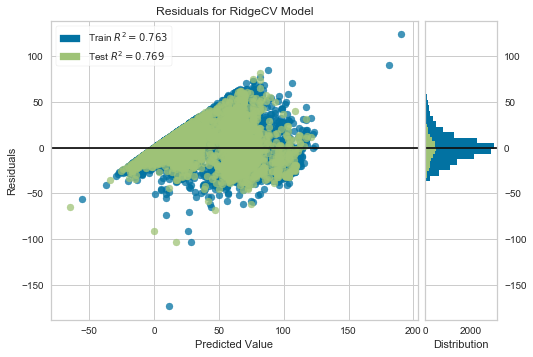

In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot

L2_res = ResidualsPlot(L2_model)
L2_res.fit(X_train, y_train)
L2_res.score(X_test, y_test)
L2_res.show()

<span style='background:yellow'>
Residuals indicate the RidgeCV model accounts for 76% of the correlation between selected features and the predicted target critical temperature. A linear relationship appears to be less clear at higher predicted values as the shape becomes more diffused, seen in the above residuals plot.
    </span>

In [21]:
from sklearn import metrics

print (metrics.mean_absolute_error(y_test, y_pred))

12.56085867631666


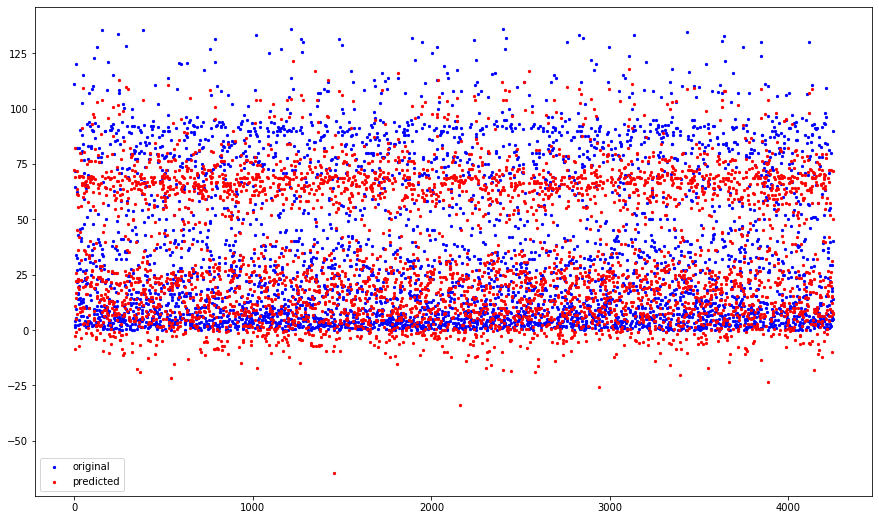

In [22]:
x = list(range(len(y_test)))
plt.figure(figsize=(15,9))
plt.scatter(x, y_test, color="blue", label="original", s=5)
plt.scatter(x, y_pred, color="red", label="predicted", s=5)
plt.legend()
plt.show() 

<span style='background:yellow'>
The mean absolute error is the absolute value of the difference between values we are predicting and real values from the test set. This tells us how large an error will be on average for using the model for predictions. Values near zero would be indicative of a model that works well in making these precitions. Any further improvements made to the model would be measurable by a comparison to this score, indicated by a lower resulting MAE. The chart of predicted and true values provides some insight that errors were larger for predictions made at higher values as the difference in overlap for that region is more distinct.
</span>

## Conclusions
<span style='background:yellow'>
Atomic radius and mass appear to be the most important attributes in predicting critical temperature of a material becoming a superconductor. Electron and thermal properties also appear to play important roles but were at significantly lower regression coefficients. The Mean Absolute Error metric and visualization for our model indicates larger differences between predictions and true values for higher temperatures in the 50-100 range which agrees with the loss in linear shape at higher temperatutes seen in the residuals plot. It is also noticeable that the model predictions contained negative values, while true values appear to have no negative values suggesting some error in the way predictions are being calculated at low temperatures.
</span>